In [76]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statistics import mode

In [122]:
data = pd.read_csv("../data/curated/outliers_removed.csv")

In [47]:
y = data['Weekly Rental Price']
x = data[['Postcode','Baths', 'Population', 'Count_School', 'Count_Station', 'Bedrooms']]
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x)

In [4]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [5]:
model = Sequential([
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(6,)),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='linear', kernel_regularizer=regularizers.l2(0.01)),
])

2022-10-01 18:05:46.082214: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.compile(optimizer = "adam",
              loss='mean_squared_logarithmic_error',
              metrics=['msle'])

In [7]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
797/797 [==============================] - 3s 2ms/step - loss: 9.8746 - msle: 9.1019 - val_loss: 2.8812 - val_msle: 1.5831
Epoch 2/100
797/797 [==============================] - 2s 3ms/step - loss: 2.2313 - msle: 0.8613 - val_loss: 1.8257 - val_msle: 0.5311
Epoch 3/100
797/797 [==============================] - 2s 2ms/step - loss: 1.5903 - msle: 0.4318 - val_loss: 1.3987 - val_msle: 0.3616
Epoch 4/100
797/797 [==============================] - 2s 2ms/step - loss: 1.2585 - msle: 0.3117 - val_loss: 1.1402 - val_msle: 0.2742
Epoch 5/100
797/797 [==============================] - 2s 3ms/step - loss: 1.0503 - msle: 0.2416 - val_loss: 0.9736 - val_msle: 0.2128
Epoch 6/100
797/797 [==============================] - 2s 3ms/step - loss: 0.9135 - msle: 0.1973 - val_loss: 0.8608 - val_msle: 0.1878
Epoch 7/100
797/797 [==============================] - 2s 2ms/step - loss: 0.8161 - msle: 0.1709 - val_loss: 0.7750 - val_msle: 0.1585
Epoch 8/100
797/797 [==============================] - 

In [8]:
model.evaluate(X_test, Y_test)[1]

171/171 [==============================] - 0s 1ms/step - loss: 0.0957 - msle: 0.0716


0.07161907851696014

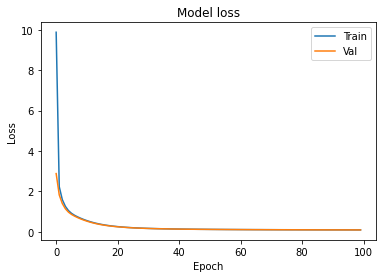

In [9]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

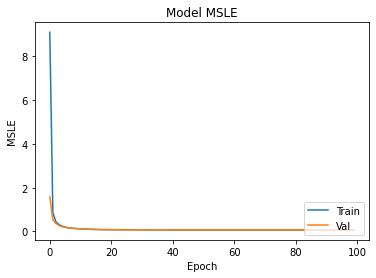

In [10]:
plt.plot(hist.history['msle'])
plt.plot(hist.history['val_msle'])
plt.title('Model MSLE')
plt.ylabel('MSLE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [12]:
prediction = model.predict(X_val)

171/171 [==============================] - 1s 1ms/step


In [13]:
# calculate the absolute errors
error = prediction - Y_val[1]
error = [abs(x) for x in error]

# print out the mean absolute error (mae)
np.mean(error)

KeyError: 1

In [14]:
# calculate the absolute errors of baseline model
y_mode = mode(Y_val)
baseline_error = [abs(y_mode-x) for x in Y_val]
np.mean(baseline_error)

91.17642998027614

In [123]:
pop = pd.read_csv("../data/curated/predicted_population.csv")

In [124]:
post_data = data[['Postcode', 'Baths','Population', 'Count_School', 'Count_Station','Bedrooms','Weekly Rental Price']]

In [125]:
pop_2023 = pop[['Postcode','2023']]
pop_2024 = pop[['Postcode','2024']]
pop_2025 = pop[['Postcode','2025']]

In [126]:
pop_2023 = pd.merge(pop_2023, post_data, how='inner', on=['Postcode'])
pop_2023 =pop_2023.drop(labels=['Population'],axis=1) 
pop_2023 = pop_2023[['Postcode', '2023', 'Baths', 'Count_School', 'Count_Station', 'Bedrooms']]

In [127]:
pop_2023['Count_School'] = pop_2023['Count_School'].fillna(value = 0)
pop_2023['Count_Station'] = pop_2023['Count_Station'].fillna(value = 0)
pop_2023 = pop_2023.dropna(axis=0)
pop_2023 = pop_2023[(pop_2023['Baths'] > 0) & (pop_2023['Bedrooms'] > 0)]
pred_2023 = model.predict(pop_2023)
data.insert(6, 'Pred_2023', pred_2023)

1138/1138 [==============================] - 2s 2ms/step


In [128]:
pop_2024 = pd.merge(pop_2024, post_data, how='inner', on=['Postcode'])
pop_2024 =pop_2024.drop(labels=['Population'],axis=1) 
pop_2024 = pop_2024[['Postcode', '2024', 'Baths', 'Count_School', 'Count_Station', 'Bedrooms']]

In [129]:
pop_2024['Count_School'] = pop_2024['Count_School'].fillna(value = 0)
pop_2024['Count_Station'] = pop_2024['Count_Station'].fillna(value = 0)
pop_2024 = pop_2024.dropna(axis=0)
pop_2024 = pop_2024[(pop_2024['Baths'] > 0) & (pop_2024['Bedrooms'] > 0)]
pred_2024 = model.predict(pop_2024)
data.insert(7, 'Pred_2024', pred_2024)

1138/1138 [==============================] - 2s 2ms/step


In [130]:
pop_2025 = pd.merge(pop_2025, post_data, how='inner', on=['Postcode'])
pop_2025 =pop_2025.drop(labels=['Population'],axis=1) 
pop_2025 = pop_2025[['Postcode', '2025', 'Baths', 'Count_School', 'Count_Station', 'Bedrooms']]

In [131]:
pop_2025['Count_School'] = pop_2025['Count_School'].fillna(value = 0)
pop_2025['Count_Station'] = pop_2025['Count_Station'].fillna(value = 0)
pop_2025 = pop_2025.dropna(axis=0)
pop_2025 = pop_2025[(pop_2025['Baths'] > 0) & (pop_2025['Bedrooms'] > 0)]
pred_2025 = model.predict(pop_2025)
data.insert(8, 'Pred_2025', pred_2025)

1138/1138 [==============================] - 2s 2ms/step


In [132]:
data

,Unnamed: 0,Postcode,Baths,Population,Count_School,Count_Station,Pred_2023,Pred_2024,Pred_2025,Bedrooms,Weekly Rental Price
0,5,3000,1,34652.148872,4.0,45.0,418.981445,418.931030,418.888977,1,440.0
1,6,3000,1,34652.148872,4.0,45.0,418.981445,418.931030,418.888977,1,440.0
2,7,3000,1,34652.148872,4.0,45.0,418.981445,418.931030,418.888977,1,440.0
3,8,3000,1,34652.148872,4.0,45.0,418.981445,418.931030,418.888977,1,440.0
4,9,3000,1,34652.148872,4.0,45.0,418.981445,418.931030,418.888977,1,440.0
...,...,...,...,...,...,...,...,...,...,...,...
36395,42824,3996,1,36889.657143,0.0,0.0,413.481476,413.277405,413.064331,2,420.0
36396,42825,3996,1,36889.657143,0.0,0.0,413.481476,413.277405,413.064331,2,370.0
36397,42826,3996,1,36889.657143,0.0,0.0,413.481476,413.277405,413.064331,2,370.0
36398,42827,3996,2,36889.657143,0.0,0.0,413.474335,413.270264,413.057190,3,475.0


In [133]:
data['rate_2023'] = (data['Pred_2023'] - data['Weekly Rental Price'])/data['Weekly Rental Price']

In [134]:
data['rate_2024'] = (data['Pred_2024'] - data['Weekly Rental Price'])/data['Weekly Rental Price']

In [135]:
data['rate_2025'] = (data['Pred_2025'] - data['Weekly Rental Price'])/data['Weekly Rental Price']

In [136]:
data.drop(columns='Unnamed: 0')

,Postcode,Baths,Population,Count_School,Count_Station,Pred_2023,Pred_2024,Pred_2025,Bedrooms,Weekly Rental Price,rate_2023,rate_2024,rate_2025
0,3000,1,34652.148872,4.0,45.0,418.981445,418.931030,418.888977,1,440.0,-0.047769,-0.047884,-0.047980
1,3000,1,34652.148872,4.0,45.0,418.981445,418.931030,418.888977,1,440.0,-0.047769,-0.047884,-0.047980
2,3000,1,34652.148872,4.0,45.0,418.981445,418.931030,418.888977,1,440.0,-0.047769,-0.047884,-0.047980
3,3000,1,34652.148872,4.0,45.0,418.981445,418.931030,418.888977,1,440.0,-0.047769,-0.047884,-0.047980
4,3000,1,34652.148872,4.0,45.0,418.981445,418.931030,418.888977,1,440.0,-0.047769,-0.047884,-0.047980
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36395,3996,1,36889.657143,0.0,0.0,413.481476,413.277405,413.064331,2,420.0,-0.015520,-0.016006,-0.016513
36396,3996,1,36889.657143,0.0,0.0,413.481476,413.277405,413.064331,2,370.0,0.117518,0.116966,0.116390
36397,3996,1,36889.657143,0.0,0.0,413.481476,413.277405,413.064331,2,370.0,0.117518,0.116966,0.116390
36398,3996,2,36889.657143,0.0,0.0,413.474335,413.270264,413.057190,3,475.0,-0.129528,-0.129957,-0.130406


In [137]:
data = data[["Postcode", "Weekly Rental Price", "Pred_2023", "Pred_2024", "Pred_2025", "rate_2023", "rate_2024", "rate_2025"]]
data

,Postcode,Weekly Rental Price,Pred_2023,Pred_2024,Pred_2025,rate_2023,rate_2024,rate_2025
0,3000,440.0,418.981445,418.931030,418.888977,-0.047769,-0.047884,-0.047980
1,3000,440.0,418.981445,418.931030,418.888977,-0.047769,-0.047884,-0.047980
2,3000,440.0,418.981445,418.931030,418.888977,-0.047769,-0.047884,-0.047980
3,3000,440.0,418.981445,418.931030,418.888977,-0.047769,-0.047884,-0.047980
4,3000,440.0,418.981445,418.931030,418.888977,-0.047769,-0.047884,-0.047980
...,...,...,...,...,...,...,...,...
36395,3996,420.0,413.481476,413.277405,413.064331,-0.015520,-0.016006,-0.016513
36396,3996,370.0,413.481476,413.277405,413.064331,0.117518,0.116966,0.116390
36397,3996,370.0,413.481476,413.277405,413.064331,0.117518,0.116966,0.116390
36398,3996,475.0,413.474335,413.270264,413.057190,-0.129528,-0.129957,-0.130406


In [138]:
data = data.groupby(by=['Postcode']).mean()

In [139]:
data

,Weekly Rental Price,Pred_2023,Pred_2024,Pred_2025,rate_2023,rate_2024,rate_2025
Postcode,,,,,,,
3000,542.697791,418.979004,418.928589,418.886597,-0.182431,-0.182529,-0.182611
3002,576.142857,424.801880,424.827484,424.856201,-0.224285,-0.224239,-0.224186
3004,547.983871,420.295502,420.293945,420.298279,-0.200944,-0.200947,-0.200938
3008,562.235772,421.880829,421.621643,421.354095,-0.221004,-0.221482,-0.221977
3011,422.217617,419.065613,418.939545,418.810852,0.086483,0.086156,0.085823
...,...,...,...,...,...,...,...
3984,441.500000,413.488922,413.294922,413.093170,-0.025705,-0.026162,-0.026638
3987,550.000000,418.664612,418.641479,418.617920,-0.238792,-0.238834,-0.238877
3992,425.000000,415.299927,415.129028,414.950867,-0.016151,-0.016555,-0.016977


In [141]:
data.to_csv("../data/curated/NNpredi.csv")

In [142]:
data

,Weekly Rental Price,Pred_2023,Pred_2024,Pred_2025,rate_2023,rate_2024,rate_2025
Postcode,,,,,,,
3000,542.697791,418.979004,418.928589,418.886597,-0.182431,-0.182529,-0.182611
3002,576.142857,424.801880,424.827484,424.856201,-0.224285,-0.224239,-0.224186
3004,547.983871,420.295502,420.293945,420.298279,-0.200944,-0.200947,-0.200938
3008,562.235772,421.880829,421.621643,421.354095,-0.221004,-0.221482,-0.221977
3011,422.217617,419.065613,418.939545,418.810852,0.086483,0.086156,0.085823
...,...,...,...,...,...,...,...
3984,441.500000,413.488922,413.294922,413.093170,-0.025705,-0.026162,-0.026638
3987,550.000000,418.664612,418.641479,418.617920,-0.238792,-0.238834,-0.238877
3992,425.000000,415.299927,415.129028,414.950867,-0.016151,-0.016555,-0.016977
